In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
df=pd.read_csv('titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Checking the shape of the dataset

In [4]:
df.shape

(891, 12)

There are 891 rows and 12 columns

checking null values

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# checking NA
df.isna().sum()

# No null and no NA values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [19]:
#unique values
df.nunique()

Sex                  3
Length             134
Diameter           111
Height              51
Whole weight      2429
Shucked weight    1515
Viscera weight     880
Shell weight       926
age                 28
dtype: int64

In [20]:
# train test data split

train, test = train_test_split(df, test_size=0.25, random_state=1)
print('Train data points :', len(train))
print('Test data points :', len(test))

Train data points : 3132
Test data points : 1045


In [21]:
#Variable separation

numerical_features = ["Length", 'Diameter', 'Height','Whole weight',
                      'Shucked weight', 'Viscera weight', 'Shell weight']

categorical_feature = "Sex"

features = numerical_features + [categorical_feature]

target = 'age'

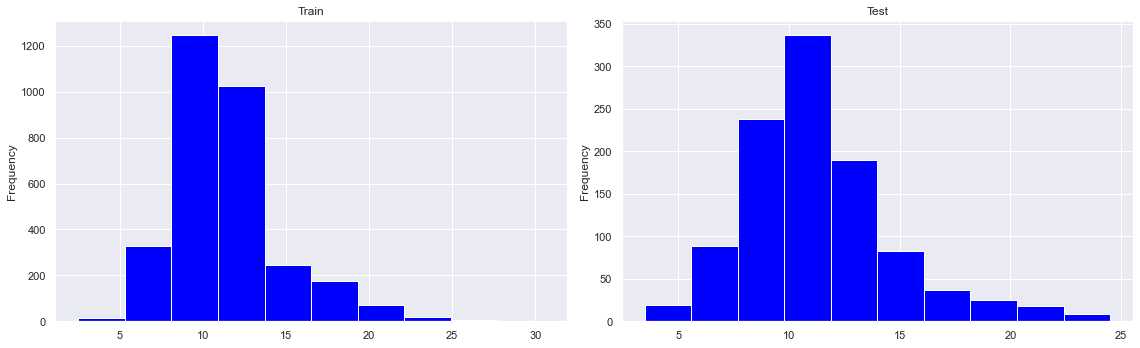

In [22]:
#Target distribution

fig, axes = plt.subplots(ncols=2,figsize=(16, 5))

train[target].plot.hist(color='blue', ax=axes[0])
axes[0].set(title="Train")

test[target].plot.hist(color='blue', ax=axes[1])
axes[1].set(title="Test")

plt.tight_layout()
plt.show()

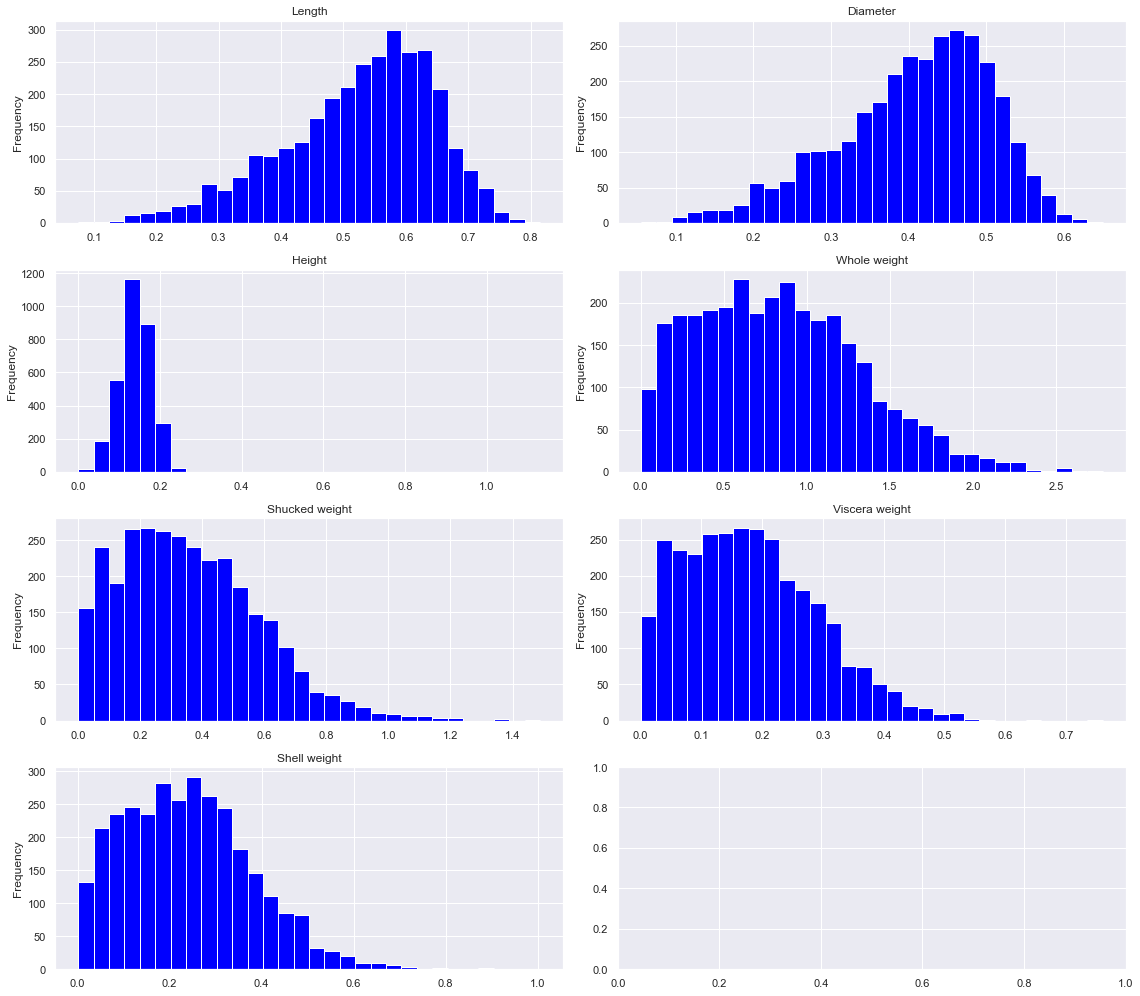

In [23]:
#Distribution of the numerical features:

fig, axes = plt.subplots(4,2,figsize=(16, 14))
axes = np.ravel(axes)

for i, c in enumerate(numerical_features):
    hist = train[c].plot(kind = 'hist', ax=axes[i], title=c, color='blue', bins=30)
    
plt.tight_layout()
plt.show()

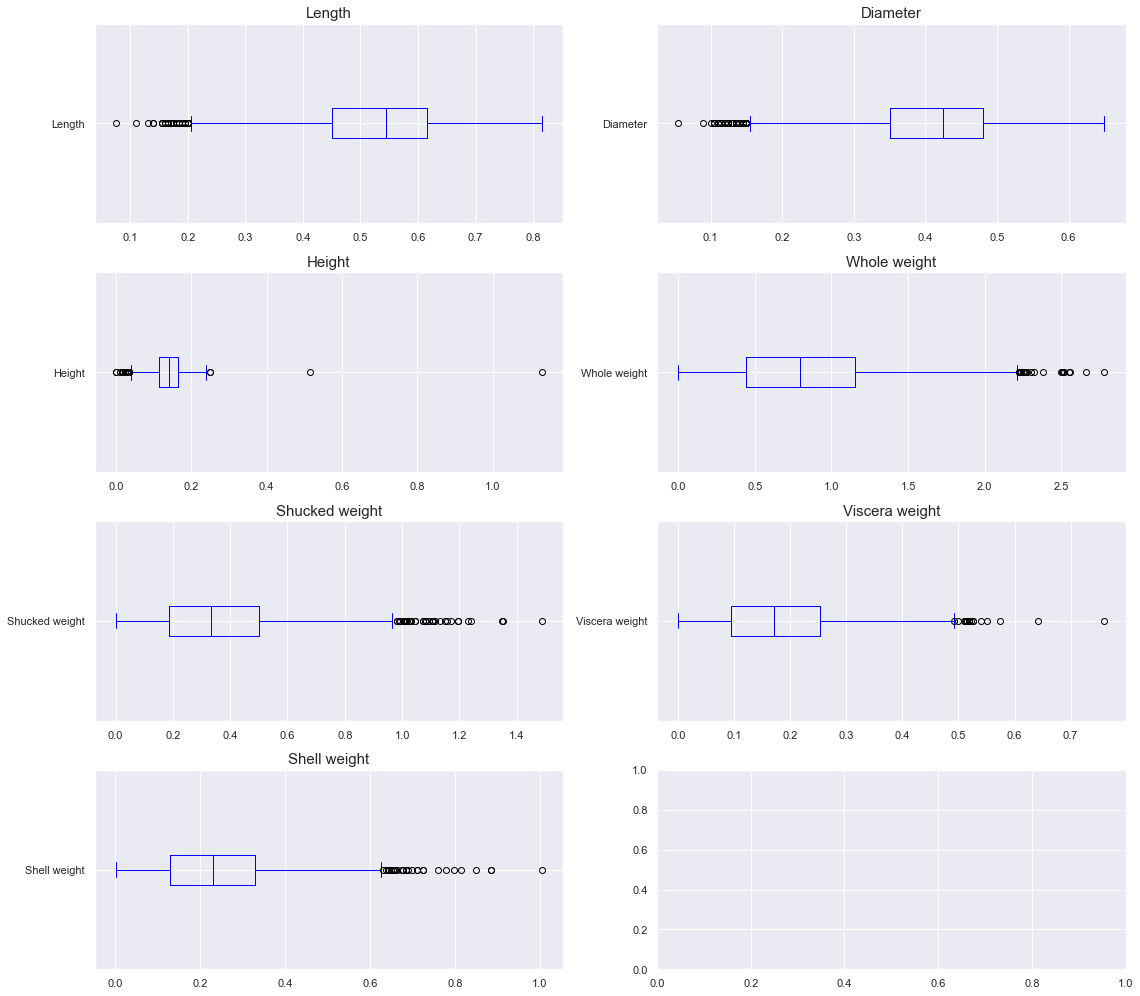

In [24]:
#Box Plot to check outliers:

fig, axes = plt.subplots(4,2,figsize=(16, 14))
axes = np.ravel(axes)

for i, c in enumerate(numerical_features):
    hist = train[c].plot(kind = 'box', ax=axes[i],color='blue', vert=False)
    axes[i].set_title(c, fontsize=15)
    
plt.tight_layout()
plt.show()

Most of the features contain outliers. Height feature has extreme outliers.

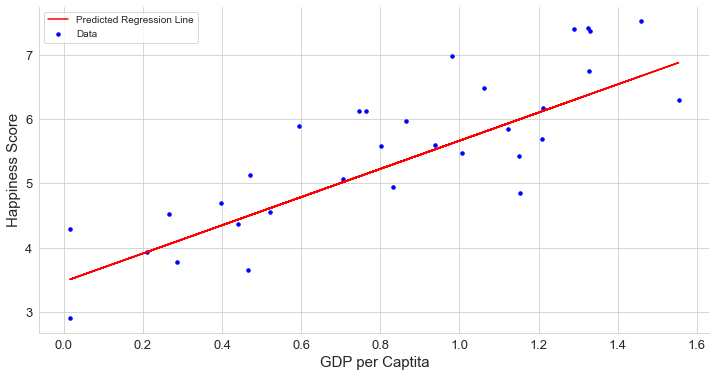

[None, None, None, None, None, None]

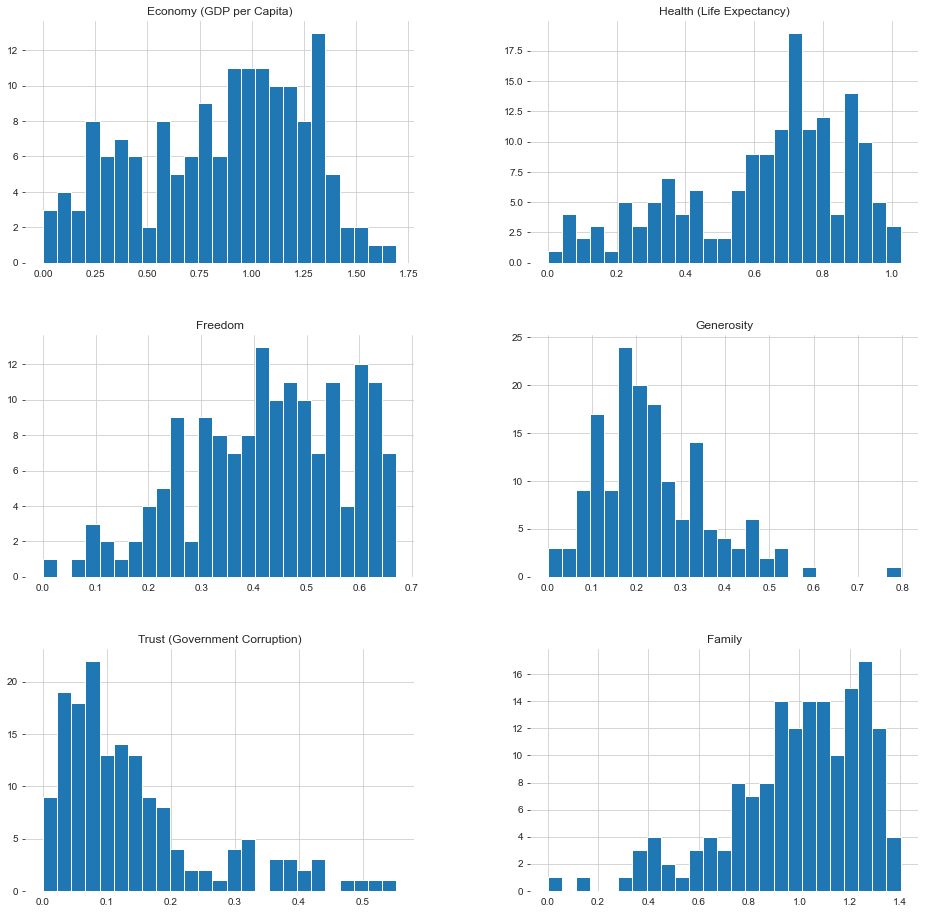

In [73]:
# DISTRIBUTION OF ALL NUMERIC DATA
plt.rcParams['figure.figsize'] = (15, 15)
df1 = df[['Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom',
              'Generosity','Trust (Government Corruption)','Family']]
h = df1.hist(bins = 25, figsize = (16,16),
             xlabelsize = '10', ylabelsize = '10')
sns.despine(left = True, bottom = True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()]

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Country'>

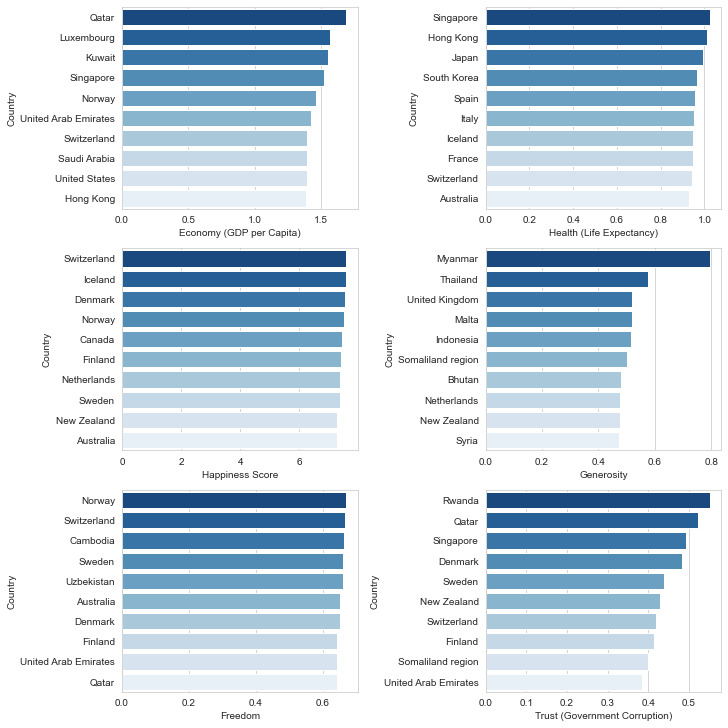

In [75]:
# Top Countries based on different criterias
fig, axes = plt.subplots(nrows=3, ncols=2,constrained_layout=True,figsize=(10,10))
sns.barplot(x='Economy (GDP per Capita)',y='Country',
                        data=df.nlargest(10,'Economy (GDP per Capita)'),
                        ax=axes[0,0],palette="Blues_r")
sns.barplot(x='Health (Life Expectancy)' ,y='Country',
                        data=df.nlargest(10,'Health (Life Expectancy)'),
                        ax=axes[0,1],palette='Blues_r')
sns.barplot(x='Happiness Score' ,y='Country',
                        data=df.nlargest(10,'Happiness Score'),
                        ax=axes[1,0],palette='Blues_r')
sns.barplot(x='Generosity' ,y='Country',
                        data=df.nlargest(10,'Generosity'),
                        ax=axes[1,1],palette='Blues_r')
sns.barplot(x='Freedom' ,y='Country',
                        data=df.nlargest(10,'Freedom'),
                        ax=axes[2,0],palette='Blues_r')
sns.barplot(x='Trust (Government Corruption)' ,y='Country',
                        data=df.nlargest(10,'Trust (Government Corruption)'),
                        ax=axes[2,1],palette='Blues_r')

To create a model with all features

In [103]:
def adjustedR2(R2,X,y):
    return (1 - (1-R2)*(len(y)-1)/(len(y)-X.shape[1]-1))

In [104]:
# MULTIPLE LINEAR REGRESSION 1
train_data_dm,test_data_dm = train_test_split(df,train_size = 0.8,random_state=3)
independent_var = ['Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom',
                   'Generosity','Trust (Government Corruption)','Family']
complex_model_1 = LinearRegression()
complex_model_1.fit(train_data_dm[independent_var],train_data_dm['Happiness Score'])
print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))
print('Happiness score = ',np.round(complex_model_1.intercept_,4),
      '+',np.round(complex_model_1.coef_[0],4),'∗ Family',
      '+',np.round(complex_model_1.coef_[1],4),'* Economy (GDP per Capita)', 
      '+',np.round(complex_model_1.coef_[2],4),'* Health (Life Expectancy)',
      '+',np.round(complex_model_1.coef_[3],4),'* Freedom',
       '+',np.round(complex_model_1.coef_[4],4),'* Generosity',
      '+',np.round(complex_model_1.coef_[5],4),'* Trust (Government Corruption)')

pred = complex_model_1.predict(test_data_dm[independent_var])
rmsecm = float(format(np.sqrt(mean_squared_error(
                       test_data_dm['Happiness Score'],pred)),'.3f'))
rtrcm = float(format(complex_model_1.score(
                        train_data_dm[independent_var],
                        train_data_dm['Happiness Score']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_1.score(
                        train_data_dm[independent_var],train_data_dm['Happiness Score']),
                        train_data_dm[independent_var],train_data_dm['Happiness Score']),'.3f'))
rtecm = float(format(complex_model_1.score(
                        test_data_dm[independent_var],
                        test_data_dm['Happiness Score']),'.3f'))

artecm = float(format(adjustedR2(complex_model_1.score(
                        test_data_dm[independent_var],test_data['Happiness Score']),
                        test_data_dm[independent_var],test_data_dm['Happiness Score']),'.3f'))
cv = float(format(cross_val_score(complex_model_1,
                    df[independent_var],
                    df['Happiness Score'],cv=5).mean(),'.3f'))
r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Linear Regression-1','selected features',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Intercept: 1.8280680048770859
Coefficients: [0.94963075 0.79787549 1.35410705 0.3888729  0.65080418 1.4529232 ]
Happiness score =  1.8281 + 0.9496 ∗ Family + 0.7979 * Economy (GDP per Capita) + 1.3541 * Health (Life Expectancy) + 0.3889 * Freedom + 0.6508 * Generosity + 1.4529 * Trust (Government Corruption)


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared(test),5-Fold Cross Validation
1,Multiple Linear Regression-1,selected features,0.540,0.771,0.759,0.788,0.737,-5.827
0,Simple Linear Regression,-,0.686,0.592,-,0.657,-,-10.133
